In [1]:
!pip install -q -U evalplus

In [2]:
from evalplus.data import get_human_eval_plus, get_mbpp_plus, write_jsonl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
sns.set_theme(style="whitegrid")


In [3]:
# Download the data
dataset_humanevalplus = get_human_eval_plus()
dataset_mbppplus = get_mbpp_plus()

# Convert to pandas dataframe
df_humanevalplus = pd.DataFrame(dataset_humanevalplus).transpose()
df_mbppplus = pd.DataFrame(dataset_mbppplus).transpose()


In [4]:

# def get_merged_df(df_problems: pd.DataFrame, path_samples:str, path_results:str) -> pd.DataFrame:
#     """
#     Merge the dataset with the generated samples and the results of the evaluation
#     :param df_problems: dataframe with the problems - humaneval+ or mbpp+
#     :param path_samples: path to the generated samples .jsonl
#     :param path_results: path to the results of the evaluation .json
#     :return: dataframe with the problems, the generated samples and the results of the evaluation
#     """
#     df = df_problems.copy()

#     with open(path_results, 'r') as f:
#         results = json.load(f)
#         results = results['eval']
#         # 'Mbpp/3': {'nfiles': 1, 'base': [['success', [1, 1, 1, 1, 1]]], 'plus': [['success', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]]}, 
#         # "Mbpp/479": {"nfiles": 1, "base": [["success", [1, 1, 1]]], "plus": [["success", [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]]},
        
#         # nfiles: number of files
#         # base and plus: success and failure and the test cases
#         df['num_samples'] = [v['nfiles'] for k, v in results.items()]
#         df['base_pass'] = [v['base'][0][0] for k, v in results.items()]
#         df['plus_pass'] = [v['plus'][0][0] for k, v in results.items()]
        

#     with open(path_samples, 'r') as f:
#         samples = [json.loads(line) for line in f.readlines()]
#         df['generated_solution'] = [sample['solution'] for sample in samples]
    
#     return df


In [5]:

def get_merged_df(df_problems: pd.DataFrame, path_samples:str, path_results:str) -> pd.DataFrame:
    """
    Merge the dataset with the generated samples and the results of the evaluation
    :param df_problems: dataframe with the problems - humaneval+ or mbpp+
    :param path_samples: path to the generated samples .jsonl
    :param path_results: path to the results of the evaluation .json
    :return: dataframe with the problems, the generated samples and the results of the evaluation
    """
    df = df_problems.copy()

    with open(path_results, 'r') as f:
        results = json.load(f)
        results = results['eval']
        # 'Mbpp/3': {'nfiles': 1, 'base': [['success', [1, 1, 1, 1, 1]]], 'plus': [['success', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]]}, 
        # "Mbpp/479": {"nfiles": 1, "base": [["success", [1, 1, 1]]], "plus": [["success", [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]]},
        
        # nfiles: number of files
        # base and plus: success and failure and the test cases
        for k, v in results.items():
            # pandas append
            # df = df.({'task_id': k, 'num_samples': v['nfiles'], 'base_pass': v['base'][0][0], 'plus_pass': v['plus'][0][0]}, ignore_index=True)
            df.loc[k, 'num_samples'] = v['nfiles']
            df.loc[k, 'base_pass'] = v['base'][0][0]
            df.loc[k, 'plus_pass'] = v['plus'][0][0]
        

    with open(path_samples, 'r') as f:
        samples = [json.loads(line) for line in f.readlines()]
        df['generated_solution'] = [sample['solution'] for sample in samples]
    
    return df


In [6]:
# samples_mistral_mbppplus = 'mistral-code/mbppplus_mistralcode_samples.jsonl'
# results_mistral_mbppplus = 'mistral-code/mbppplus_mistralcode_samples_eval_results.json'

# df_temp = custom_get_merged_df(df_mbppplus, samples_mistral_mbppplus, results_mistral_mbppplus)

# df_temp.head()

In [7]:
# print_row(df_temp, 'Mbpp/478')

In [9]:
def print_row(df: pd.DataFrame, task_id: str) -> None:
    """
    Print the row of the dataframe at the given index
    :param df: dataframe
    :param index: index of the row to print
    """
    row = df[df.index == task_id]
    print(f"Task ID: {task_id}")
    print(f"prompt: {row['prompt'].values}")
    print(f"canonical solution: {row['canonical_solution'].values}")
    print(f"Generated solution: {row['generated_solution'].values}")
    print(f"Base pass: {row['base_pass'].values}")
    print(f"Plus pass: {row['plus_pass'].values}")
    print()


## Read Mistral-Code data

In [10]:
# mistral -> mbppplus + samples generated + results

samples_mistral_mbppplus = 'mistral-code/mbppplus_mistralcode_samples.jsonl'
results_mistral_mbppplus = 'mistral-code/mbppplus_mistralcode_samples_eval_results.json'

df_mistral_mbpp = get_merged_df(df_mbppplus, samples_mistral_mbppplus, results_mistral_mbppplus)

df_mistral_mbpp.head()

,task_id,prompt,entry_point,canonical_solution,base_input,atol,plus_input,contract,assertion,num_samples,base_pass,plus_pass,generated_solution
Mbpp/2,Mbpp/2,"""""""\nWrite a function to find the shared eleme...",similar_elements,"\ndef similar_elements(test_tup1, test_tup2):\...","[[(3, 4, 5, 6), (5, 7, 4, 10)], [(1, 2, 3, 4),...",0,"[[(), ()], [(1, 2, 3), ()], [(), (4, 5, 6)], [...","\n assert isinstance(test_tup1, tuple), ""inva...","\nassert similar_elements((3, 4, 5, 6),(5, 7, ...",1.0,failed,failed,"def similar_elements(list1, list2):\n retur..."
Mbpp/3,Mbpp/3,"""""""\nWrite a python function to identify non-p...",is_not_prime,\nimport math\ndef is_not_prime(n):\n if n ...,"[[1], [2], [10], [35], [37]]",0,"[[7919], [10007], [524287], [7920], [True], [1...","\n assert isinstance(n, int), ""invalid inpu...",\nassert is_not_prime(1) == True\nassert is_no...,1.0,success,success,def is_not_prime(n):\n if n <= 1:\n ...
Mbpp/4,Mbpp/4,"""""""\nWrite a function to find the n largest in...",heap_queue_largest,\nimport heapq as hq\ndef heap_queue_largest(n...,"[[[25, 35, 22, 85, 14, 65, 75, 22, 58], 3], [[...",0,"[[[9, 8, 7, 6, 5, 4, 3, 2, 1], 3], [[100, 200,...","\n assert isinstance(nums, list), ""invalid in...","\nassert heap_queue_largest( [25, 35, 22, 85, ...",1.0,failed,failed,"def heap_queue_largest(numbers, n):\n heap ..."
Mbpp/6,Mbpp/6,"""""""\nWrite a python function to check whether ...",differ_At_One_Bit_Pos,\ndef is_Power_Of_Two(x: int): \n return x ...,"[[13, 9], [15, 8], [2, 4], [2, 3], [5, 1], [1,...",0,"[[0, 0], [-10, 10], [100, 100], [-50, -100], [...","\n assert isinstance(a, int), ""invalid inpu...","\nassert differ_At_One_Bit_Pos(13,9) == True\n...",1.0,failed,failed,"def differ_At_One_Bit_Pos(a, b):\n if a ^ b..."
Mbpp/7,Mbpp/7,"""""""\nWrite a function to find all words which ...",find_char_long,\nimport re\ndef find_char_long(text):\n retu...,"[[Please move back to stream], [Jing Eco and T...",0,"[[], [This is a very long string with no words...","\n assert isinstance(text, str), ""invalid inp...",\nassert set(find_char_long('Please move back ...,1.0,success,failed,def find_char_long(string):\n return [word ...


### Exploratory data analysis
There are some questions that we want to answer:
1. Since mbpp doesn't mention the function signature in the prompt, does this affect the model's evaluation results because it may generate wrong entry points?
1. Do the generated code which contains extra assert statements after the function implementation result in failure?

In [11]:
# check if entry point is in the generated solution
df_mistral_mbpp['entry_point_in_solution'] = df_mistral_mbpp.apply(lambda row: row['entry_point'] in row['generated_solution'], axis=1)
# df_mistral_mbpp.head()

In [12]:
# check number of false entry_point_in_solution
df_mistral_mbpp['entry_point_in_solution'].value_counts()

entry_point_in_solution
True     386
False     13
Name: count, dtype: int64

In [13]:
# print the false entry_point_in_solution
df_mistral_mbpp[df_mistral_mbpp['entry_point_in_solution'] == False][['entry_point', 'generated_solution', 'base_pass', 'plus_pass']]

,entry_point,generated_solution,base_pass,plus_pass
Mbpp/20,is_woodall,def is_woodball(n):\n if n % 2 == 0 and n %...,failed,failed
Mbpp/64,subject_marks,def sort_tuples(tuples):\n return sorted(tu...,failed,failed
Mbpp/79,word_len,def is_odd_length(word):\n return len(word)...,failed,failed
Mbpp/115,empty_dit,def is_empty_dict(dicts):\n for d in dicts:...,failed,failed
Mbpp/119,search,def find_unique_element(arr):\n unique_elem...,failed,failed
Mbpp/226,odd_values_string,def remove_odd_index_values(string):\n retu...,failed,failed
Mbpp/232,larg_nnum,"def largest_nnum(nums, n):\n return sorted(...",failed,failed
Mbpp/582,my_dict,def is_empty(d):\n return len(d) == 0\n,failed,failed
Mbpp/633,pair_xor_Sum,"def pair_xor_sum(lst, target):\n sum = 0\n ...",failed,failed
Mbpp/639,sample_nam,def sum_names(names):\n return sum([len(nam...,failed,failed


In [14]:
print(df_mistral_mbpp[df_mistral_mbpp['task_id'] == 'Mbpp/79'][['prompt', 'generated_solution']].values[0])

['"""\nWrite a python function to check whether the length of the word is odd or not.\nassert word_len("Hadoop") == False\n"""\n'
 'def is_odd_length(word):\n    return len(word) % 2 != 0\n']


- **Question 1 is answered**

    That answers the question of if different function name would result in direct failure of the code.
We can see that all the samples that have a different entry point name with the generated code's function name has failed the tests. However, the if we change it to the proper name, it still needs to be evaluated for the functional correctness.

    This task is done in the `fix_entry_point_name.py` script.

In [15]:
# question 2 about generated boilerplate code/assert statements
df_mistral_mbpp.apply(lambda row: 'assert' in row['generated_solution'], axis=1).value_counts()
# there's no assert statement in the mbpp+ generated solution in mistral model

False    399
Name: count, dtype: int64

In [16]:
# check if after the last retun statement there is any code (after last return there's anything other than new line characters)
df_mistral_mbpp['is_junk_after_implementation'] = df_mistral_mbpp.apply(lambda row: row['generated_solution'].split('return')[-1].split('\n')[-1].strip() != '', axis=1)

# # chec those out
df_mistral_mbpp[df_mistral_mbpp['is_junk_after_implementation'] == True][['entry_point', 'generated_solution', 'base_pass', 'plus_pass']]


,entry_point,generated_solution,base_pass,plus_pass
Mbpp/71,comb_sort,def comb_sort(lst):\n n = len(lst)\n if ...,failed,failed
Mbpp/226,odd_values_string,def remove_odd_index_values(string):\n retu...,failed,failed
Mbpp/478,remove_lowercase,def remove_lowercase(string):\n return stri...,failed,failed


- **Question 2 is not answered**
    Mistral_Code

    Mistral-Code was able to properly generate a solution that doesn't contain extra code after the implementation of the function. So, we can't answer this question with this dataset. but Phi-2-Code dataset can be used to answer this question.

In [17]:
print(df_mistral_mbpp[df_mistral_mbpp['task_id'] == 'Mbpp/478']['prompt'].values[0])
print(df_mistral_mbpp[df_mistral_mbpp['task_id'] == 'Mbpp/478']['plus_input'].values[0])
print(df_mistral_mbpp[df_mistral_mbpp['task_id'] == 'Mbpp/478']['generated_solution'].values[0])

"""
Write a function to remove lowercase substrings from a given string.
assert remove_lowercase("PYTHon")==('PYTH')
"""

[[''], ['AbCdEfGhIjKlMnOpQrStUvWxYz'], ['aBCDefghIJKLMNOpQRSTUVWXYz'], ['aBcDeFgHiJkLmNoPqRsTuVwXyZ'], ['aBCDefgaBcDeFgHiJkLmNoPqRsTuVwXyZhIJKLMNOpQRSTUVWXYz'], ['AbQCdEfKGhIjKlMnOpQrStUvWxYz'], ['aBCDefgaBcDeFgHiJkLmNoPqRsTuVwXyZhIJKLMNOpaQRSTUVWXYz'], ['aBCDefgaBcDeFgHiJkLmNoPqRsTuVwXRyZhIJKLMNOpaQRSTUVWXYz'], ['aBcDeFgHiJkLmNoPqRsTuVwZ'], ['AbCdEfGhIhjKlMnOpQrStUvWxYz'], ['AbCdEfGhIjKlMnOpQrStUUvWxYz'], ['aAbCdEfGhIjKlMnOpQrStUUvWxYzBcDeFgHiJkLmNoPqRsTuVwXyZ'], ['AbCdEfGhIhjKlMnOpQrStUaBcDeFgHiJkLmNoPqRsTuVwXyZvWxYz'], ['aBCDefgaBcDeFgHiJkLmVwXRyAbCdEfGhIhjKlMnOpQrStUvWxYzZhIJKLMNOpaQRSTUVWXYz'], ['aBCDefgaBcDeFgHiJkLmNoPqRsTuaBCDefgaBcDeFgHiJkLmVwXRyAbCdEfGhIhjKlMnOpQrStUvWxYzZhIJKLMNOpaQRSTUVWXYzRSTUVWXYz'], ['aBcDeaBCDefgaBcDeFgHiJkLmNoPqRsTuVwXRyZhIJKLMNOpaQRSTUVWXYzFgHiJkLmNoPqRsTuVwXyZ'], ['aBCDefgaBcDeFgHiJkLmNoPqRsTuaBCDefgaBcDeFgHiJkLmVwXRyAbCdEfGhIhjKlM

## Read Phi-2-Code data

### Phi-2 on MBPP+ samples

In [18]:
# mbppplus + samples generated
# import json
samples_phi2_mbppplus = 'phi2-code/mbpp_phi2_samples.jsonl'
results_phi2_mbppplus = 'phi2-code/mbpp_phi2_samples_eval_results.json'

df_phi2_mbpp = get_merged_df(df_mbppplus, samples_phi2_mbppplus, results_phi2_mbppplus)

df_phi2_mbpp.head()

,task_id,prompt,entry_point,canonical_solution,base_input,atol,plus_input,contract,assertion,num_samples,base_pass,plus_pass,generated_solution
Mbpp/2,Mbpp/2,"""""""\nWrite a function to find the shared eleme...",similar_elements,"\ndef similar_elements(test_tup1, test_tup2):\...","[[(3, 4, 5, 6), (5, 7, 4, 10)], [(1, 2, 3, 4),...",0,"[[(), ()], [(1, 2, 3), ()], [(), (4, 5, 6)], [...","\n assert isinstance(test_tup1, tuple), ""inva...","\nassert similar_elements((3, 4, 5, 6),(5, 7, ...",1.0,failed,failed,"def similar_elements(list1, list2):\n retur..."
Mbpp/3,Mbpp/3,"""""""\nWrite a python function to identify non-p...",is_not_prime,\nimport math\ndef is_not_prime(n):\n if n ...,"[[1], [2], [10], [35], [37]]",0,"[[7919], [10007], [524287], [7920], [True], [1...","\n assert isinstance(n, int), ""invalid inpu...",\nassert is_not_prime(1) == True\nassert is_no...,1.0,success,success,def is_not_prime(n):\n if n <= 1:\n ...
Mbpp/4,Mbpp/4,"""""""\nWrite a function to find the n largest in...",heap_queue_largest,\nimport heapq as hq\ndef heap_queue_largest(n...,"[[[25, 35, 22, 85, 14, 65, 75, 22, 58], 3], [[...",0,"[[[9, 8, 7, 6, 5, 4, 3, 2, 1], 3], [[100, 200,...","\n assert isinstance(nums, list), ""invalid in...","\nassert heap_queue_largest( [25, 35, 22, 85, ...",1.0,failed,failed,"def heap_queue_largest(arr, n):\n heap = []..."
Mbpp/6,Mbpp/6,"""""""\nWrite a python function to check whether ...",differ_At_One_Bit_Pos,\ndef is_Power_Of_Two(x: int): \n return x ...,"[[13, 9], [15, 8], [2, 4], [2, 3], [5, 1], [1,...",0,"[[0, 0], [-10, 10], [100, 100], [-50, -100], [...","\n assert isinstance(a, int), ""invalid inpu...","\nassert differ_At_One_Bit_Pos(13,9) == True\n...",1.0,success,failed,"def differ_At_One_Bit_Pos(x, y):\n xor = x ..."
Mbpp/7,Mbpp/7,"""""""\nWrite a function to find all words which ...",find_char_long,\nimport re\ndef find_char_long(text):\n retu...,"[[Please move back to stream], [Jing Eco and T...",0,"[[], [This is a very long string with no words...","\n assert isinstance(text, str), ""invalid inp...",\nassert set(find_char_long('Please move back ...,1.0,failed,failed,def find_char_long(string):\n words = strin...


In [21]:
# humaneval+ and generated samples merged

samples_phi2_humaneval = 'phi2-code/humaneval_phi2_samples.jsonl'
results_phi2_humaneval = 'phi2-code/humaneval_phi2_samples_eval_results.json'

df_phi2_humaneval = get_merged_df(df_humanevalplus, samples_phi2_humaneval, results_phi2_humaneval)

df_phi2_humaneval.head()

,task_id,prompt,entry_point,canonical_solution,test,contract,base_input,atol,plus_input,num_samples,base_pass,plus_pass,generated_solution
HumanEval/0,HumanEval/0,from typing import List\n\n\ndef has_close_ele...,has_close_elements,\n\n sorted_numbers = sorted(numbers)\n ...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...","\n assert isinstance(threshold, float) and ...","[[[1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.3], [[1.0,...",0,"[[[1.0, 2.5, 3.0, 4.5, 5.0, 6.5], 0.4], [[1.0,...",1.0,success,success,from typing import List\n\ndef has_close_eleme...
HumanEval/1,HumanEval/1,from typing import List\n\n\ndef separate_pare...,separate_paren_groups,"\n\n cnt, group, results = 0, """", []\n f...","\n\nMETADATA = {\n 'author': 'jt',\n 'da...","\n assert type(paren_string) == str, ""inval...","[[(()()) ((())) () ((())()())], [() (()) ((())...",0,"[[()], [(())], [((()))()], [()()()], [()(()())...",1.0,failed,failed,from typing import List\n\ndef separate_paren_...
HumanEval/2,HumanEval/2,\n\ndef truncate_number(number: float) -> floa...,truncate_number,\n\n return number - int(number)\n\n,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...","\n assert number > 0, ""invalid inputs"" # $_...","[[3.5], [1.33], [123.456]]",0.000001,"[[999.99999], [0.3333333], [1.0], [1.5], [0.5]...",1.0,success,success,def truncate_number(number: float) -> float:\n...
HumanEval/3,HumanEval/3,from typing import List\n\n\ndef below_zero(op...,below_zero,\n account = 0\n for operation in operat...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...","\n assert type(operations) == list, ""invali...","[[[]], [[1, 2, -3, 1, 2, -3]], [[1, 2, -4, 5, ...",0,"[[[0]], [[0, 0, 0, 0]], [[1, 2, 3, -6]], [[-1,...",1.0,success,success,from typing import List\n\ndef below_zero(oper...
HumanEval/4,HumanEval/4,from typing import List\n\n\ndef mean_absolute...,mean_absolute_deviation,\n mean = sum(numbers) / len(numbers)\n ...,"\n\nMETADATA = {\n 'author': 'jt',\n 'da...","\n assert all(isinstance(x, float) for x in...","[[[1.0, 2.0, 3.0]], [[1.0, 2.0, 3.0, 4.0]], [[...",0.000001,"[[[-1.0, 4.5, 0.0, 2.5, -3.0]], [[0.0, 0.0, 0....",1.0,success,success,from typing import List\n\ndef mean_absolute_d...


In [22]:
# merge the two dataframes 
df_phi2_humaneval['dataset'] = 'humaneval+'
df_phi2_mbpp['dataset'] = 'mbpp+'
df_phi2_eval = pd.concat([df_phi2_humaneval, df_phi2_mbpp])

### Exploratory data analysis
There are some questions that we want to answer:
1. Since mbpp doesn't mention the function signature in the prompt, does this affect the model's evaluation results because it may generate wrong entry points?
1. Do the generated code which contains extra assert statements after the function implementation result in failure?

#### Analyis on MBPP+

In [23]:
# check if entry point is in the generated solution
df_phi2_mbpp['entry_point_in_solution'] = df_phi2_mbpp.apply(lambda row: row['entry_point'] in row['generated_solution'], axis=1)

# check number of false entry_point_in_solution
df_phi2_mbpp['entry_point_in_solution'].value_counts()

entry_point_in_solution
True     384
False     15
Name: count, dtype: int64

In [24]:
# print the false entry_point_in_solution
df_phi2_mbpp[df_phi2_mbpp['entry_point_in_solution'] == False][['entry_point', 'generated_solution', 'base_pass', 'plus_pass']]

,entry_point,generated_solution,base_pass,plus_pass
Mbpp/16,text_lowercase_underscore,def is_lowercase_underscore(text):\n return...,failed,failed
Mbpp/77,is_Diff,def is_divisible_by_11(num):\n sum = 0\n ...,failed,failed
Mbpp/129,magic_square_test,def is_magic_square(matrix):\n n = len(matr...,failed,failed
Mbpp/226,odd_values_string,def remove_odd_index_values(string):\n retu...,failed,failed
Mbpp/232,larg_nnum,"def larger_nnum(lst, n):\n lst.sort(reverse...",failed,failed
Mbpp/420,cube_Sum,def cube_sum(n):\n sum = 0\n for i in ra...,failed,failed
Mbpp/477,is_lower,def to_lower(string):\n return string.lower...,failed,failed
Mbpp/554,Split,def split(lst):\n return [x for x in lst if...,failed,failed
Mbpp/582,my_dict,def is_empty(d):\n return len(d) == 0\n\nas...,failed,failed
Mbpp/629,Split,def split(numbers):\n even_numbers = []\n ...,failed,failed


In [25]:
# question 2 about generated boilerplate code/assert statements
df_phi2_mbpp['assert_in_solution'] = df_phi2_mbpp.apply(lambda row: 'assert' in row['generated_solution'], axis=1)
df_phi2_mbpp['assert_in_solution'].value_counts()

assert_in_solution
False    226
True     173
Name: count, dtype: int64

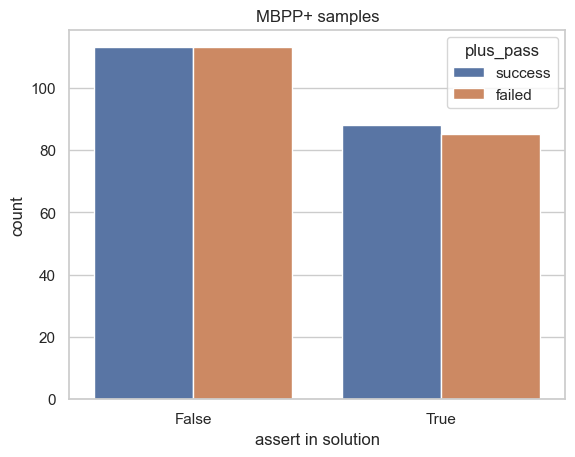

In [26]:
# plot the number success and failure and if assert is in the solution

# stacked bar plot
ax = sns.countplot(x="assert_in_solution", hue="plus_pass", data=df_phi2_mbpp)
plt.xlabel('assert in solution')
plt.ylabel('count')
plt.title('MBPP+ samples')
plt.show()

#### Analysis on HumanEval+

In [ ]:
# check if entry point is in the generated solution
df_phi2_humaneval['entry_point_in_solution'] = df_phi2_humaneval.apply(lambda row: row['entry_point'] in row['generated_solution'], axis=1)

# check number of false entry_point_in_solution
df_phi2_humaneval['entry_point_in_solution'].value_counts()

In [ ]:
# print the false entry_point_in_solution
df_phi2_humaneval[df_phi2_humaneval['entry_point_in_solution'] == False][['entry_point', 'generated_solution', 'base_pass', 'plus_pass']]

#### Analysis on All samples

In [ ]:
# get the 

print_row(df_phi2_humaneval, 'Humaneval/1')